# Problem Statement

Kickstarter is a popular crowdfunding platform where users can raise funding for their projects. In the exploratory analysis previously done the factors affecting the success of a crowdfunding campaign. Here the goal is to predict if a kickstarter project will be successful or will fail before its actual deadline.

In [7]:
#Setting up required libraries and packages

In [8]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data Overview

There are a combined data of 700,000+ projects from two data sources.
Below is the brief summary of the explanatory variables

ID                :  It is the unique identifier for a project.

Name              :  Name of the project seeking crowdfunding.

Category          :  Category in which the project falls

Main Category     :  The high level category on which the project falls

Currency          :  Self - Explanatory.

Deadline          :  The date by which the project tends to seek crowdfunding for the campaign. 

Goal              :  Amount the crowdfunding campaign seeks for itself.

Launched          :  The date on which the project is launched.

Pledged           :  The amount that was pledged by the backers of the campaign.

State             :  The final state, determining whether the project was successful, unsuccessful, cancelled or failed.

Backers           :  The count of the number of users backing the project.

Country           :  The country of origination

USD Pledged       :  The amount in US Dollor pledged for the project.

In [9]:
# Importing Data
df_kick_201801 = pd.read_csv("ks-projects-201801.csv",encoding = "utf-8",low_memory=False)
df_kick_201612 = pd.read_csv("ks-projects-201612.csv",encoding = "utf-8",low_memory=False)

Checking the structure of the of the two datasets

In [10]:
print(df_kick_201801.shape)
print(df_kick_201612.shape)

(378661, 15)
(323750, 17)


Checking the relevant columns and merge the two datasets,
df_kick_main is the main workset for the analysis

In [11]:
#df_kick_201612_Workset=df_kick_201612.iloc[:,0:12]
df_kick_main=df_kick_201801.iloc[:,0:12]
#df_kick_main = df_kick_201612_Workset.append(df_kick_201801_Workset)

Aggregated Dataset

In [12]:
df_kick_main.shape
df_kick_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
ID               378661 non-null int64
name             378657 non-null object
category         378661 non-null object
main_category    378661 non-null object
currency         378661 non-null object
deadline         378661 non-null object
goal             378661 non-null float64
launched         378661 non-null object
pledged          378661 non-null float64
state            378661 non-null object
backers          378661 non-null int64
country          378661 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 34.7+ MB


Segregating the variables as categorical and constinuous

In [13]:
df_kick_main.columns = ['ID','name','category','main_category','currency','deadline','goal','launched','pledged','state','backers','country']

ks_cat_vars=[ 'category', 'main_category', 'currency','country']
ks_cont_vars=['goal', 'pledged', 'backers','pledged']

Checking correlation among the continous variables defined above. It can be seen that pledged (USD amount) and backers have high correlation > 0.75. It is expected behavior as more backers would mean more amount pledged.


In [65]:
#df_kick_main[ks_cont_vars]

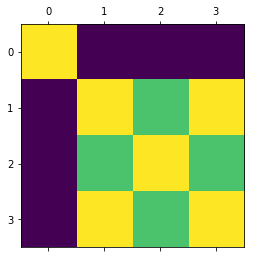

In [66]:
import matplotlib.pyplot as plt

plt.matshow(df_kick_main[ks_cont_vars].corr())

Filtering only for successful and failed projects for subsequent EDA

In [16]:
kick_projects = df_kick_main[(df_kick_main['state'] == 'failed') | (df_kick_main['state'] == 'successful')]
#converting 'successful' state to 1 and failed to 0
kick_projects['state'] = (kick_projects['state'] =='successful').astype(int)
print(kick_projects.shape)

(331675, 12)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
#checking distribution of projects across various main categories
kick_projects.groupby(['main_category','state']).size()
#kick_projects.groupby(['category','state']).size()

main_category  state
Art            0        14131
               1        11510
Comics         0         4036
               1         5842
Crafts         0         5703
               1         2115
Dance          0         1235
               1         2338
Design         0        14814
               1        10550
Fashion        0        14182
               1         5593
Film & Video   0        32904
               1        23623
Food           0        15969
               1         6085
Games          0        16003
               1        12518
Journalism     0         3137
               1         1012
Music          0        21752
               1        24197
Photography    0         6384
               1         3305
Publishing     0        23145
               1        12300
Technology     0        20616
               1         6434
Theater        0         3708
               1         6534
dtype: int64

To visualise the distribution of the original states, the original dataset is used 'df_kick_main' is used.
To make more sense of the state distributions the percentages of the states are visualised.

In [18]:
percentual_sucess = round(df_kick_main["state"].value_counts() / len(df_kick_main["state"]) * 100,2)

print("State Percentual in %: ")
print(percentual_sucess)

state = round(df_kick_main["state"].value_counts() / len(df_kick_main["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Distribuition of States', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

State Percentual in %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


In the subsequent three plots (in a defined gridline)
The log scaled goal and pledged amount is plotted for both failed and sucessful projects

In [19]:
df_failed = df_kick_main[df_kick_main["state"] == "failed"]
df_sucess = df_kick_main[df_kick_main["state"] == "successful"]

#First plot
trace0 = go.Histogram(
    x= np.log(df_kick_main.goal + 1),
    histnorm='probability', showlegend=False,
    xbins=dict(
        start=-5.0,
        end=19.0,
        size=1),
    autobiny=True)

#Second plot
trace1 = go.Histogram(
    x = np.log(df_kick_main.pledged + 1),
    histnorm='probability', showlegend=False,
    xbins=dict(
        start=-1.0,
        end=17.0,
        size=1))

# Add histogram data
x1 = np.log(df_failed['goal']+1)
x2 = np.log(df_sucess["goal"]+1)

trace3 = go.Histogram(
    x=x1,
    opacity=0.60, nbinsx=30, name='Goals Failed', histnorm='probability'
)
trace4 = go.Histogram(
    x=x2,
    opacity=0.60, nbinsx=30, name='Goals Sucessful', histnorm='probability'
)


data = [trace0, trace1, trace3, trace4]
layout = go.Layout(barmode='overlay')

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[ [{'colspan': 2}, None], [{}, {}]],
                          subplot_titles=('Failed and Sucessful Projects',
                                          'Goal','Pledged'))

#setting the figs
fig.append_trace(trace0, 2, 1)
fig.append_trace(trace1, 2, 2)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 1, 1)

#fig['layout'].update(title="Distribuitions",
 #                    height=500, width=900, barmode='overlay')
#iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1           -      ]
[ (2,1) x2,y2 ]  [ (2,2) x3,y3 ]



#Feature Engineering

The  below code snippet does the following:

Part 1 : Extraction of components like year, month, hour from launch date.
Part 2 : Extraction of components like year, month, time to deadline from deadline date.
Part 3 : Calculating project duration

In [20]:
df_kick_main['launched'] = pd.to_datetime(df_kick_main['launched'])
df_kick_main['laun_month_year'] = df_kick_main['launched'].dt.to_period("M")
df_kick_main['laun_year'] = df_kick_main['launched'].dt.to_period("A")
df_kick_main['laun_hour'] = df_kick_main['launched'].dt.hour

df_kick_main['deadline'] = pd.to_datetime(df_kick_main['deadline'])
df_kick_main['dead_month_year'] = df_kick_main['deadline'].dt.to_period("M")
df_kick_main['dead_year'] = df_kick_main['launched'].dt.to_period("A")


#Creating a new columns with Campaign total months
df_kick_main['time_campaign'] = df_kick_main['dead_month_year'] - df_kick_main['laun_month_year']
df_kick_main['time_campaign'] = df_kick_main['time_campaign'].astype(int)

The crucial piece of visualisation is how project duration affects the state of the project.
The duration is calulated as time campaign above.

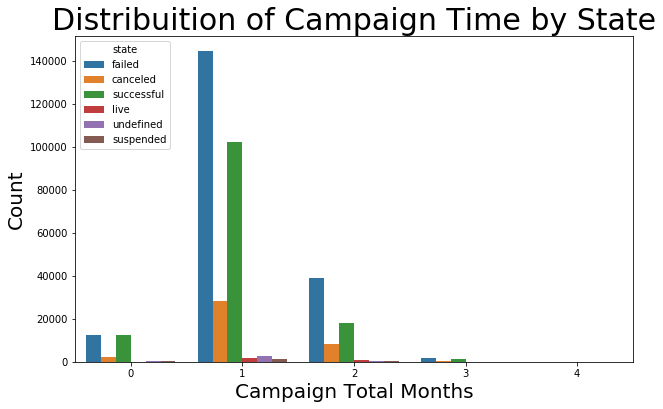

Descriptions of Campaign Time x State
state          canceled  failed  live  successful  suspended  undefined
time_campaign                                                          
0                  2044   12276    62       12494        153        280
1                 28144  144494  1785      102102       1251       2710
2                  8132   38960   948       18240        433        570
3                   453    1976     4        1117          8          2
4                     0      13     0           3          0          0


In [21]:
plt.figure(figsize = (10,6))

ax = sns.countplot(x='time_campaign', hue='state', 
                   data=df_kick_main[df_kick_main['time_campaign'] < 10])
ax.set_title("Distribuition of Campaign Time by State", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

print("Descriptions of Campaign Time x State")
print(pd.crosstab(df_kick_main[df_kick_main['time_campaign'] < 5]['time_campaign'], df_kick_main.state))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



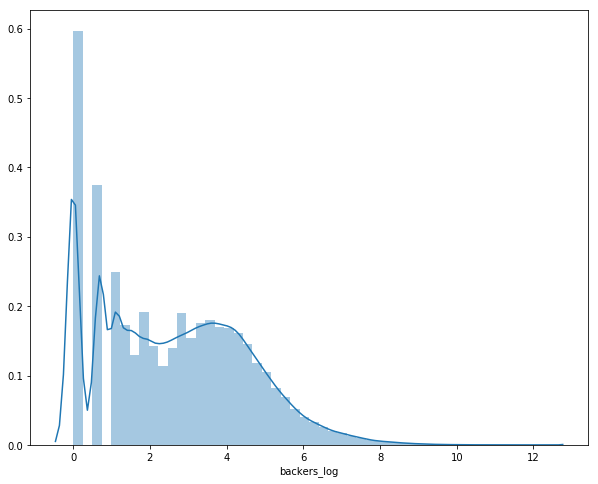

In [22]:
df_kick_main['backers_log'] = np.log(df_kick_main['backers'] + 1 ) 

plt.figure(figsize = (10,8))
sns.distplot(df_kick_main['backers_log'])

plt.show()

Plotting density plot of log of backers count for the projects.
This gives some idea how the backers for the project are distributed.
1 is added to the backers count to take care of cases with zero backers (in the log term)

In [23]:
#creating features from the project name

#length of name
df_kick_main['name_len'] = df_kick_main.name.str.len()

# presence of !
df_kick_main['name_exclaim'] = (df_kick_main.name.str[-1] == '!').astype(int)

# presence of ?
df_kick_main['name_question'] = (df_kick_main.name.str[-1] == '?').astype(int)

# number of words in the name
df_kick_main['name_words'] = df_kick_main.name.apply(lambda x: len(str(x).split(' ')))

# if name is uppercase
df_kick_main['name_is_upper'] = df_kick_main.name.str.isupper().astype(float)

In [42]:
#list(df_kick_main)
df_kick_main.shape

(378661, 239)

Engineering more features.
1. Log of the goal binned into categories
2. Percentile Bucket for goal.
3. Percentile Bucket for duration

In [39]:
# normalizing goal by applying log
df_kick_main['goal_log'] = np.log1p(kick_projects.goal)
#creating goal features to check what range goal lies in
df_kick_main['Goal_10'] = kick_projects.goal.apply(lambda x: x // 10)
df_kick_main['Goal_1000'] = kick_projects.goal.apply(lambda x: x // 1000)
df_kick_main['Goal_100'] = kick_projects.goal.apply(lambda x: x // 100)
df_kick_main['Goal_500'] = kick_projects.goal.apply(lambda x: x // 500)


df_kick_main['goal_cat_perc'] =  df_kick_main.groupby(['category'])['goal'].transform(
                     lambda x: pd.qcut(x, [0, .35, .70, 1.0], labels =[1,2,3]))

df_kick_main['duration_cat_perc'] =  df_kick_main.groupby(['category'])['time_campaign'].transform(
                     lambda x: pd.qcut(x, [0, .35, .70, 1.0], labels =False, duplicates='drop'))

ONE HOT ENCODING OF CATEGORY COLUMNS

In [40]:
# One-Hot encoding to convert categorical columns to numeric
print('start one-hot encoding')

df_kick_main = pd.get_dummies(df_kick_main, prefix = [ 'category', 'main_category', 'currency','country'],
                             columns = [ 'category', 'main_category', 'currency','country'])
    
#this will have created 1-0 flag columns (like a sparse matrix)    
print('ADS dummy columns made')

start one-hot encoding
ADS dummy columns made


In [43]:
#list(df_kick_main)

Building a random forest classifier.
First prediction model, bagged tree based algorithm random forest. The algorithm here uses
Gini coefficient to determine the optimality of the node split.
The model trained tabulates the feature importance as a quantified measure. 

Importing libraries for random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
import math

In this part the feature count of the random forest model is extracted and tuning parameters are given as an input.
Also the dataset is split into train and test

In [55]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_kick_main, test_size=0.2)


Defining model parameters

In [48]:
features_count = train_ind.shape[1]

parameters_rf = {'n_estimators':[30], 'max_depth':[20], 'max_features': 
                     [math.floor(np.sqrt(features_count)), math.floor(features_count/3)]}


Function to train the model with the pre-defined model parameters

In [62]:
response=['state']
features=['name',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'backers',
 'laun_month_year',
 'laun_year',
 'laun_hour',
 'dead_month_year',
 'dead_year',
 'time_campaign',
 'backers_log',
 'name_len',
 'name_exclaim',
 'name_question',
 'name_words',
 'name_is_upper',
 'goal_log',
 'Goal_10',
 'Goal_1000',
 'Goal_100',
 'Goal_500',
 'goal_reached',
 'goal_cat_perc',
 'duration_cat_perc',
 'category_3D Printing',
 'category_Academic',
 'category_Accessories',
 'category_Action',
 'category_Animals',
 'category_Animation',
 'category_Anthologies',
 'category_Apparel',
 'category_Apps',
 'category_Architecture',
 'category_Art',
 'category_Art Books',
 'category_Audio',
 'category_Bacon',
 'category_Blues',
 'category_Calendars',
 'category_Camera Equipment',
 'category_Candles',
 'category_Ceramics',
 "category_Children's Books",
 'category_Childrenswear',
 'category_Chiptune',
 'category_Civic Design',
 'category_Classical Music',
 'category_Comedy',
 'category_Comic Books',
 'category_Comics',
 'category_Community Gardens',
 'category_Conceptual Art',
 'category_Cookbooks',
 'category_Country & Folk',
 'category_Couture',
 'category_Crafts',
 'category_Crochet',
 'category_DIY',
 'category_DIY Electronics',
 'category_Dance',
 'category_Design',
 'category_Digital Art',
 'category_Documentary',
 'category_Drama',
 'category_Drinks',
 'category_Electronic Music',
 'category_Embroidery',
 'category_Events',
 'category_Experimental',
 'category_Fabrication Tools',
 'category_Faith',
 'category_Family',
 'category_Fantasy',
 "category_Farmer's Markets",
 'category_Farms',
 'category_Fashion',
 'category_Festivals',
 'category_Fiction',
 'category_Film & Video',
 'category_Fine Art',
 'category_Flight',
 'category_Food',
 'category_Food Trucks',
 'category_Footwear',
 'category_Gadgets',
 'category_Games',
 'category_Gaming Hardware',
 'category_Glass',
 'category_Graphic Design',
 'category_Graphic Novels',
 'category_Hardware',
 'category_Hip-Hop',
 'category_Horror',
 'category_Illustration',
 'category_Immersive',
 'category_Indie Rock',
 'category_Installations',
 'category_Interactive Design',
 'category_Jazz',
 'category_Jewelry',
 'category_Journalism',
 'category_Kids',
 'category_Knitting',
 'category_Latin',
 'category_Letterpress',
 'category_Literary Journals',
 'category_Literary Spaces',
 'category_Live Games',
 'category_Makerspaces',
 'category_Metal',
 'category_Mixed Media',
 'category_Mobile Games',
 'category_Movie Theaters',
 'category_Music',
 'category_Music Videos',
 'category_Musical',
 'category_Narrative Film',
 'category_Nature',
 'category_Nonfiction',
 'category_Painting',
 'category_People',
 'category_Performance Art',
 'category_Performances',
 'category_Periodicals',
 'category_Pet Fashion',
 'category_Photo',
 'category_Photobooks',
 'category_Photography',
 'category_Places',
 'category_Playing Cards',
 'category_Plays',
 'category_Poetry',
 'category_Pop',
 'category_Pottery',
 'category_Print',
 'category_Printing',
 'category_Product Design',
 'category_Public Art',
 'category_Publishing',
 'category_Punk',
 'category_Puzzles',
 'category_Quilts',
 'category_R&B',
 'category_Radio & Podcasts',
 'category_Ready-to-wear',
 'category_Residencies',
 'category_Restaurants',
 'category_Robots',
 'category_Rock',
 'category_Romance',
 'category_Science Fiction',
 'category_Sculpture',
 'category_Shorts',
 'category_Small Batch',
 'category_Software',
 'category_Sound',
 'category_Space Exploration',
 'category_Spaces',
 'category_Stationery',
 'category_Tabletop Games',
 'category_Taxidermy',
 'category_Technology',
 'category_Television',
 'category_Textiles',
 'category_Theater',
 'category_Thrillers',
 'category_Translations',
 'category_Typography',
 'category_Vegan',
 'category_Video',
 'category_Video Art',
 'category_Video Games',
 'category_Wearables',
 'category_Weaving',
 'category_Web',
 'category_Webcomics',
 'category_Webseries',
 'category_Woodworking',
 'category_Workshops',
 'category_World Music',
 'category_Young Adult',
 'category_Zines',
 'main_category_Art',
 'main_category_Comics',
 'main_category_Crafts',
 'main_category_Dance',
 'main_category_Design',
 'main_category_Fashion',
 'main_category_Film & Video',
 'main_category_Food',
 'main_category_Games',
 'main_category_Journalism',
 'main_category_Music',
 'main_category_Photography',
 'main_category_Publishing',
 'main_category_Technology',
 'main_category_Theater',
 'currency_AUD',
 'currency_CAD',
 'currency_CHF',
 'currency_DKK',
 'currency_EUR',
 'currency_GBP',
 'currency_HKD',
 'currency_JPY',
 'currency_MXN',
 'currency_NOK',
 'currency_NZD',
 'currency_SEK',
 'currency_SGD',
 'currency_USD',
 'country_AT',
 'country_AU',
 'country_BE',
 'country_CA',
 'country_CH',
 'country_DE',
 'country_DK',
 'country_ES',
 'country_FR',
 'country_GB',
 'country_HK',
 'country_IE',
 'country_IT',
 'country_JP',
 'country_LU',
 'country_MX',
 'country_N,0"',
 'country_NL',
 'country_NO',
 'country_NZ',
 'country_SE',
 'country_SG',
 'country_US']

train_dep=train[ks_cont_vars]
train_ind=train['state']


test_dep=test[ks_cont_vars]
test_ind=test['state']

In [63]:

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier(n_estimators=50,criterion='gini' ,max_depth=20, max_features=2)
    clf.fit(features, target)
    return clf


In [64]:

trained_model_RF= random_forest_classifier(train_ind[features], train_dep[response])


Model Predictions

In [ ]:
# Predict the on the train_data
test_ind["Pred_state_RF"] = trained_model_RF.predict(test_ind[features])

# Predict the on the train_data
train_ind["Pred_state_RF"] = trained_model_RF.predict(train_ind[features])

# Predict the on the train_data
kick_projects_ip["Pred_state_RF"] = trained_model_RF.predict(kick_projects_ip_scaled_ftrs)

Model prediction results

In [ ]:
# Train and Test Accuracy
print ("Train Accuracy :: ", accuracy_score(train_dep[response], trained_model_RF.predict(train_ind[features])))
print ("Test Accuracy  :: ", accuracy_score(test_dep[response], trained_model_RF.predict(test_ind[features])))
print ("Complete Accuracy  :: ", accuracy_score(kick_projects_ip[response], trained_model_RF.predict(kick_projects_ip_scaled_ftrs)))
print (" Confusion matrix of complete data is", confusion_matrix(kick_projects_ip[response],kick_projects_ip["Pred_state_RF"]))

Train set for LGBM Classifier

In [ ]:


clf_lgbm = LGBMClassifier(
        n_estimators=300,
        num_leaves=15,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )



#Fitting the LGBM Classifier

In [69]:
clf_lgbm.fit(train_ind, 
        train_dep,
        eval_set= [(X_train, Y_train), (X_test, Y_test)], 
        eval_metric='auc', 
        verbose=0, 
        early_stopping_rounds=30
       )


LGBM Results

In [ ]:
clf_lgbm